In [2]:
import pandas as pd
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

#Repositório de dados eleitorais do TSE (ANO DE 2018): 
#http://www.tse.jus.br/hotsites/pesquisas-eleitorais/eleitorado_anos/2018.html
#Arquivo CSV ~700mb
#Pode-se utilizar o mesmo código para analisar o perfil dos anos anteriores

filename = 'perfil_eleitorado_2018.csv'
df = pd.read_csv(filename, encoding='ISO-8859-1', sep=';')

df.shape

df.rename(columns={'DT_GERACAO': 'DATA DA GERACAO',
                   'HH_GERACAO': 'HORA DA GERACAO',
                   'ANO_ELEICAO': 'ANO DA ELEICAO',
                   'SG_UF': 'SIGLA ESTADO',
                   'CD_MUNICIPIO': 'CODIGO DO MUNICIPIO',
                   'NM_MUNICIPIO': 'MUNICIPIO DE RESIDENCIA',
                   'CD_MUN_SIT_BIOMETRIA': 'CODIGO/SITUACAO DA BIOMETRIA',
                   'DS_MUN_SIT_BIOMETRIA': 'SITUACAO DA BIOMETRIA',
                   'NR_ZONA': 'NUMERO DA ZONA',
                   'CD_GENERO': 'CODIGO DO GENERO',
                   'DS_GENERO': 'GENERO',
                   'CD_ESTADO_CIVIL': 'CODIGO DO ESTADO CIVIL',
                   'DS_ESTADO_CIVIL': 'ESTADO CIVIL',
                   'CD_FAIXA_ETARIA': 'CODIGO DA FAIXA ETARIA',
                   'DS_FAIXA_ETARIA': 'FAIXA ETARIA',
                   'CD_GRAU_ESCOLARIDADE': 'CODIGO/GRAU DE ESCOLARIDADE',
                   'DS_GRAU_ESCOLARIDADE': 'GRAU DE ESCOLADIRADE',
                   'QT_ELEITORES_PERFIL': 'QTD PERFIL DE ELEITORES',
                   'QT_ELEITORES_BIOMETRIA': 'QTD ELEITORES BIOMETRIA',
                   'QT_ELEITORES_DEFICIENCIA': ' QTD ELEITORES COM DEFICIENCIA',
                   'QT_ELEITORES_INC_NM_SOCIAL': 'QT_ELEITORES_INC_NM_SOCIAL'
                  }, inplace=True)

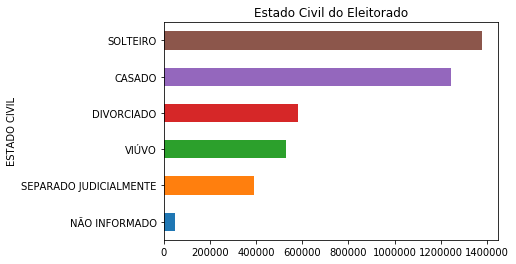

In [41]:
#Dados gerais sobre o estado civil do eleitorado cadastrado
df.groupby('ESTADO CIVIL').size().sort_values().plot(kind='barh',title='Estado Civil do Eleitorado')

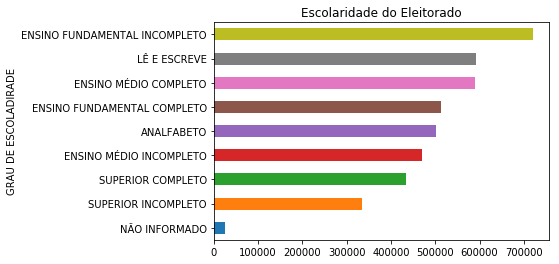

In [40]:
#Dados gerais sobre O grau de escolaridade do eleitorado que votou nas eleições de 2018, 
#sendo possível observar como grande maioria tem ensino fundamental incompleto
df.groupby('GRAU DE ESCOLADIRADE').size().sort_values().plot(kind='barh',title='Escolaridade do Eleitorado')

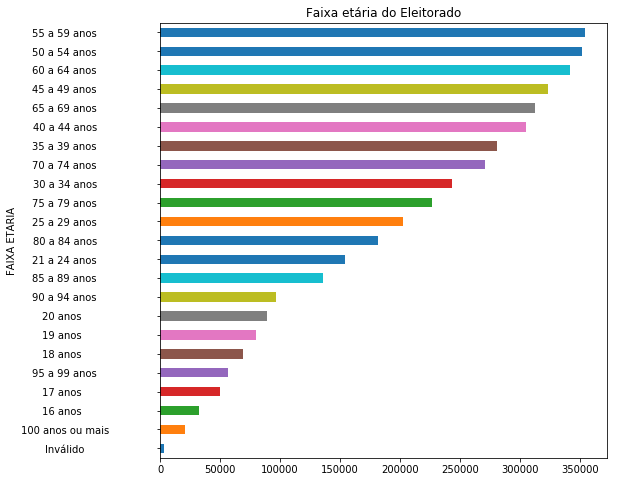

In [39]:
#Dados gerais sobre a faixa etária da população que votou nas eleições de 2018
df.groupby('FAIXA ETARIA').size().sort_values().plot(kind='barh', figsize=(8,8),title='Faixa etária do Eleitorado')

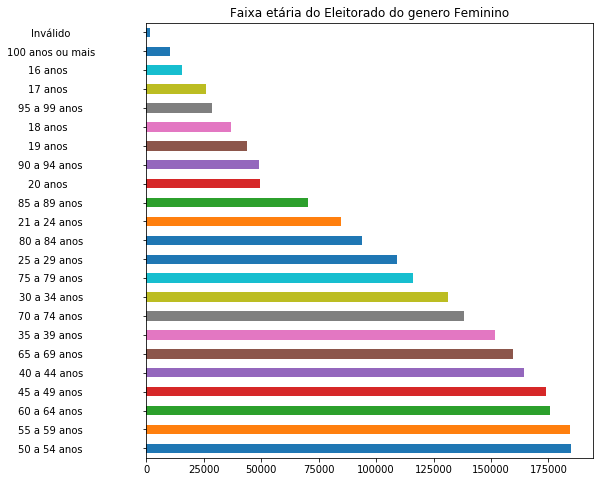

In [38]:
#Separando os gêneros é possível observar que dentre as mulheres o grupo entre 50 e 54 anos é o que mais tem representantes
df.query('GENERO == "FEMININO"')['FAIXA ETARIA'].value_counts().plot(kind='barh', figsize=(8,8),title='Faixa etária do Eleitorado do genero Feminino')

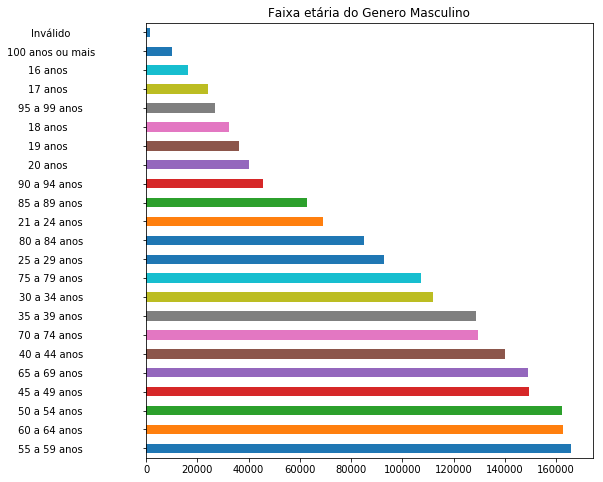

In [37]:
#Dividindo-se entre os homens a faixa etária predominante fica por conta dos com idade entre 55 e 59 anos
df.query('GENERO == "MASCULINO"')['FAIXA ETARIA'].value_counts().plot(kind='barh', figsize=(8,8), title='Faixa etária do Eleitorado do genero Masculino')

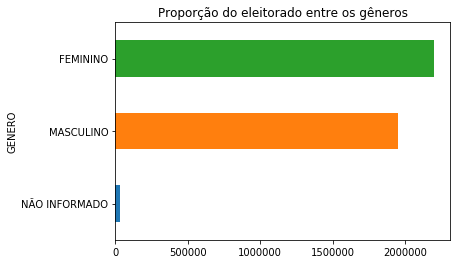

In [50]:
#Com nitidez é possivel observar que as mulheres são a maior parte do eleitorado brasileiro
df.groupby('GENERO').size().sort_values().plot(kind='barh',title='Proporção do eleitorado entre os gêneros')

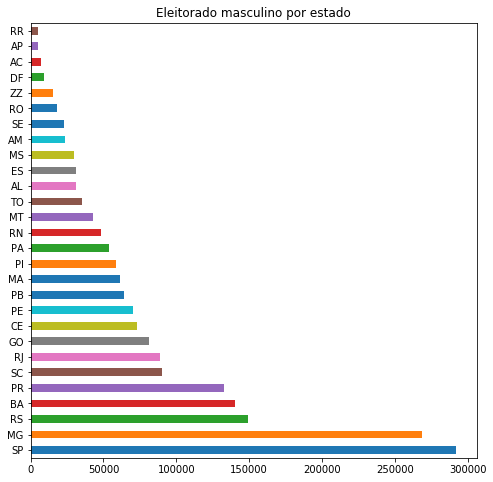

In [43]:
#Distribuição do eleitorado masculino entre os estados
df.query('GENERO == "MASCULINO"')['SIGLA ESTADO'].value_counts().plot(kind='barh', figsize=(8,8),title='Eleitorado masculino por estado')

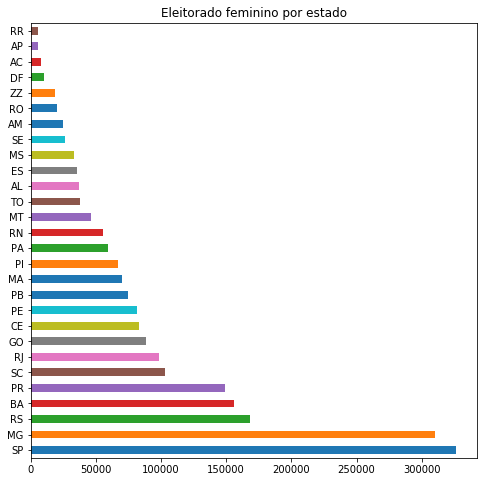

In [44]:
#Distribuição do eleitorado feminino entre os estados
df.query('GENERO == "FEMININO"')['SIGLA ESTADO'].value_counts().plot(kind='barh', figsize=(8,8),title='Eleitorado feminino por estado')

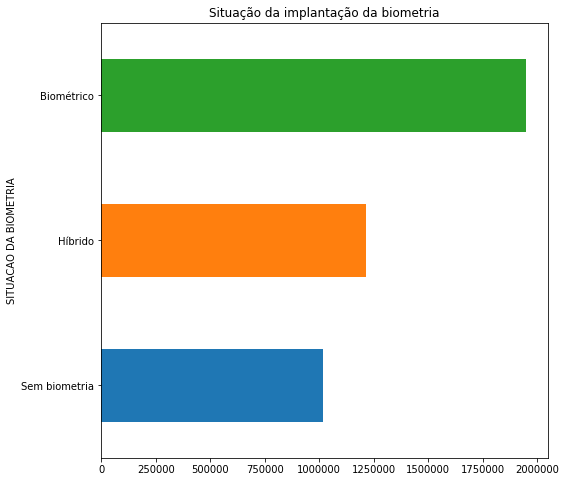

In [51]:
#Nesta visão é possivel observar o progresso da implantação da biometria no país que já está avançado
df.groupby('SITUACAO DA BIOMETRIA').size().sort_values().plot(kind='barh', figsize=(8,8),title='Situação da implantação da biometria')

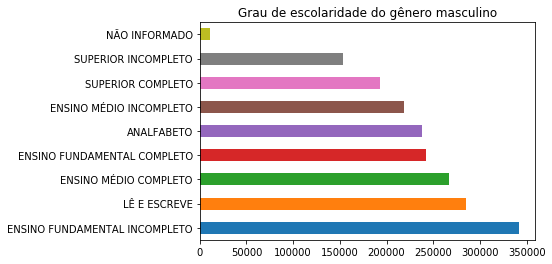

In [46]:
#Dividindo-se o grau de escolaridade por gênero é possível observar que os homens em relação as mulheres
#tem o maior número de pessoas que apenas lê e escreve e o número menor de pessoas com ensino superior completo
df.query('GENERO == "MASCULINO"')['GRAU DE ESCOLADIRADE'].value_counts().plot(kind='barh',title='Grau de escolaridade do gênero masculino')

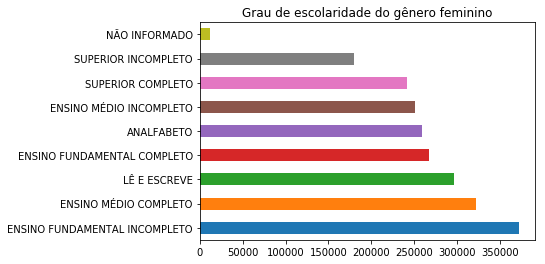

In [47]:
#Dividindo-se o grau de escolaridade por gênero é possível observar que os homens em relação as mulheres
#tem o maior número de pessoas que apenas lê e escreve e o número menor número de pessoas com ensino superior completo
df.query('GENERO == "FEMININO"')['GRAU DE ESCOLADIRADE'].value_counts().plot(kind='barh',title='Grau de escolaridade do gênero feminino')

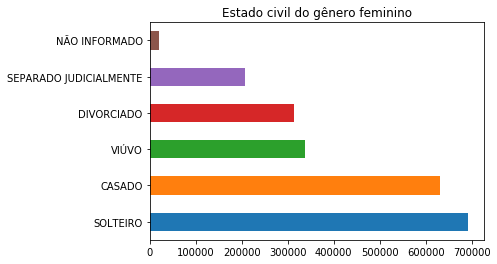

In [48]:
#Percebe-se aqui a os efeitos da maior espectativa de vida das mulheres, que tem o maior número de pessoas 
#cujo estado civil é de "VIUVA"
df.query('GENERO == "FEMININO"')['ESTADO CIVIL'].value_counts().plot(kind='barh',title='Estado civil do gênero feminino')

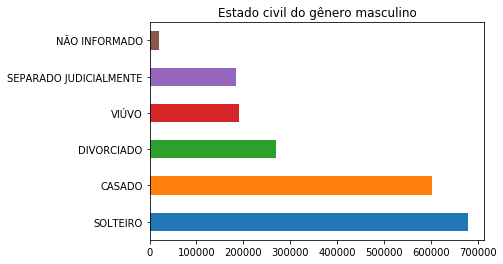

In [49]:
#Os homens por outro lado tem o maior número de divórcios
df.query('GENERO == "MASCULINO"')['ESTADO CIVIL'].value_counts().plot(kind='barh',title='Estado civil do gênero masculino')